## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Mon Mar 02 13:11:15 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 442.19       Driver Version: 442.19       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce 940M       WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8    N/A /  N/A |    302MiB /  2048MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


Using TensorFlow backend.


In [11]:
train, test = keras.datasets.cifar10.load_data()

In [15]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = 2 * (x / 255) -1.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y  

In [16]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [19]:
x_train

array([[-0.5372549 , -0.51372549, -0.50588235, ..., -0.03529412,
        -0.27843137, -0.43529412],
       [ 0.20784314,  0.38823529,  0.46666667, ...,  0.12156863,
         0.04313725,  0.12941176],
       [ 1.        ,  1.        ,  1.        , ..., -0.37254902,
        -0.3254902 , -0.34117647],
       ...,
       [-0.7254902 ,  0.39607843,  0.84313725, ..., -0.90588235,
        -0.75686275, -0.60784314],
       [ 0.48235294,  0.65490196,  0.88235294, ...,  0.52941176,
         0.49019608,  0.34117647],
       [ 0.79607843,  0.79607843,  0.8745098 , ...,  0.27843137,
         0.27843137,  0.2627451 ]])

In [20]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model



In [21]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [22]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [23]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [24]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 170us/step - loss: 1.6752 - accuracy: 0.4078 - val_loss: 1.5042 - val_accuracy: 0.4709
Epoch 2/100
50000/50000 [==============================] - 8s 155us/step - loss: 1.4462 - accuracy: 0.4922 - val_loss: 1.4344 - val_accuracy: 0.4939
Epoch 3/100
50000/50000 [==============================] - 8s 160us/step - loss: 1.3244 - accuracy: 0.5359 - val_loss: 1.4038 - val_accuracy: 0.5123
Epoch 4/100
50000/50000 [==============================] - 9s 182us/step - loss: 1.2327 - accuracy: 0.5671 - val_loss: 1.4160 - val_accuracy: 0.5059
Epoch 5/100
50000/50000 [==============================] - 9s 175us/step - loss: 1.1426 - accuracy: 0.5990 - val_loss: 1.3924 - val_accuracy: 0.5249
Epoch 6/100
50000/50000 [==============================] - 11s 227us/step - loss: 1.0626 - accuracy: 0.6272 - val_loss: 1.3950 - val_accuracy: 0.5315
Epoch 7/100
50000/50000 [==============================

50000/50000 [==============================] - 9s 188us/step - loss: 0.1238 - accuracy: 0.9600 - val_loss: 4.4747 - val_accuracy: 0.5201
Epoch 56/100
50000/50000 [==============================] - 8s 166us/step - loss: 0.1081 - accuracy: 0.9655 - val_loss: 4.5963 - val_accuracy: 0.5194
Epoch 57/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.0893 - accuracy: 0.9693 - val_loss: 4.6593 - val_accuracy: 0.5232
Epoch 58/100
50000/50000 [==============================] - 8s 155us/step - loss: 0.0704 - accuracy: 0.9765 - val_loss: 4.6088 - val_accuracy: 0.5296
Epoch 59/100
50000/50000 [==============================] - 8s 155us/step - loss: 0.0707 - accuracy: 0.9772 - val_loss: 4.7682 - val_accuracy: 0.5252
Epoch 60/100
50000/50000 [==============================] - 9s 177us/step - loss: 0.0803 - accuracy: 0.9740 - val_loss: 4.7279 - val_accuracy: 0.5277
Epoch 61/100
50000/50000 [==============================] - 8s 162us/step - loss: 0.1158 - accuracy: 0.9630 - val

C:\Users\USER\Anaconda3\envs\tf_2\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.116999). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


50000/50000 [==============================] - 14s 280us/step - loss: 0.0889 - accuracy: 0.9717 - val_loss: 5.0362 - val_accuracy: 0.5216
Epoch 78/100
50000/50000 [==============================] - 14s 281us/step - loss: 0.0865 - accuracy: 0.9722 - val_loss: 5.1339 - val_accuracy: 0.5254
Epoch 79/100
50000/50000 [==============================] - 15s 305us/step - loss: 0.0874 - accuracy: 0.9738 - val_loss: 5.2606 - val_accuracy: 0.5246
Epoch 80/100
50000/50000 [==============================] - 14s 289us/step - loss: 0.0718 - accuracy: 0.9769 - val_loss: 5.3184 - val_accuracy: 0.5262
Epoch 81/100
50000/50000 [==============================] - 12s 233us/step - loss: 0.0590 - accuracy: 0.9809 - val_loss: 5.3497 - val_accuracy: 0.5230
Epoch 82/100
50000/50000 [==============================] - 8s 154us/step - loss: 0.0825 - accuracy: 0.9744 - val_loss: 5.3052 - val_accuracy: 0.5221
Epoch 83/100
50000/50000 [==============================] - 11s 214us/step - loss: 0.0935 - accuracy: 0.9709

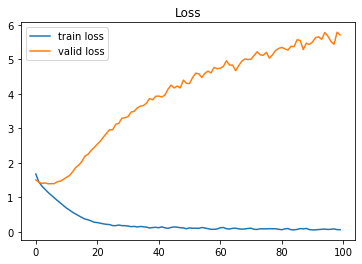

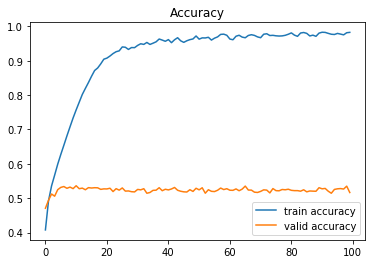

In [26]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()